In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [29]:
# read table for medication doses taken over 24 week period
m = pd.read_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/raw_data_files/T_FRDOS.csv')

display(m.shape) # check shape and head
m[:5]

(160908, 19)

,PATIENTNUMBER,SITE,VISIT,PATIENTID,VISITID,DOS002,DOS002_UNIT,DOS002_NORM,DOS005,DOS005_UNIT,DOS005_NORM,DOS006,DOS006_UNIT,DOS006_NORM,VISITDT,DOS001,DOS001_DT,VISITDT_Dt,patdeid
0,NaN,NaN,WK0,NaN,15034,2.0,NaN,2.0,8.0,NaN,8.0,1.0,NaN,1.0,NaN,NaN,.,0.0,1
1,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,16.0,NaN,16.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
2,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
3,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,24.0,NaN,24.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1
4,NaN,NaN,WK1,NaN,15037,2.0,NaN,2.0,32.0,NaN,32.0,1.0,NaN,1.0,NaN,NaN,.,6.0,1


In [30]:
# retrieve column names
m.columns

Index(['PATIENTNUMBER', 'SITE', 'VISIT', 'PATIENTID', 'VISITID', 'DOS002',
       'DOS002_UNIT', 'DOS002_NORM', 'DOS005', 'DOS005_UNIT', 'DOS005_NORM',
       'DOS006', 'DOS006_UNIT', 'DOS006_NORM', 'VISITDT', 'DOS001',
       'DOS001_DT', 'VISITDT_Dt', 'patdeid'],
      dtype='object')

In [31]:
# drop columns whose data we are not using for this analysis

m = m.drop(columns=['PATIENTNUMBER','DOS001','SITE', 'PATIENTID', 'VISITID','DOS002_UNIT', 'DOS002_NORM','DOS005_UNIT', 'DOS005_NORM','DOS006_UNIT', 'DOS006_NORM', 'VISITDT','DOS001_DT', 'VISITDT_Dt'], axis=1)

m[:1] # check column names

,VISIT,DOS002,DOS005,DOS006,patdeid
0,WK0,2.0,8.0,1.0,1


In [32]:
# rename columns according to documentation for interpretability

new_columns = {'DOS002':'medication','DOS005':'total_dose','DOS006':'admin_location'}


In [33]:
# renaming columns

m = m.rename(columns=new_columns)

m[:1] # check column names

,VISIT,medication,total_dose,admin_location,patdeid
0,WK0,2.0,8.0,1.0,1


In [34]:
# reorder columns for easier interpretation

m = m.reindex(columns=['patdeid','VISIT','medication','total_dose','admin_location'])

m[:1] # check column names

,patdeid,VISIT,medication,total_dose,admin_location
0,1,WK0,2.0,8.0,1.0


In [35]:
# filter view to specific patient ID
# use groupby to index by VISIT to view all 24 visits and values for each visit

m.loc[m.patdeid==1825].groupby('VISIT').agg('first')

,patdeid,medication,total_dose,admin_location
VISIT,,,,
WK0,1825,2.0,8.0,1.0
WK1,1825,2.0,16.0,1.0
WK10,1825,2.0,24.0,1.0
WK11,1825,2.0,24.0,1.0
WK12,1825,2.0,24.0,1.0
WK13,1825,2.0,24.0,2.0
WK14,1825,2.0,24.0,1.0
WK15,1825,2.0,24.0,1.0
WK16,1825,2.0,24.0,1.0


In [36]:
# remove 'WK' from VISIT change dtype to int, providing ordinal value for weekly visits

m['VISIT'] = m['VISIT'].str.replace('WK','').astype(int)

m[:5] # check first few rows

,patdeid,VISIT,medication,total_dose,admin_location
0,1,0,2.0,8.0,1.0
1,1,1,2.0,16.0,1.0
2,1,1,2.0,24.0,1.0
3,1,1,2.0,24.0,1.0
4,1,1,2.0,32.0,1.0


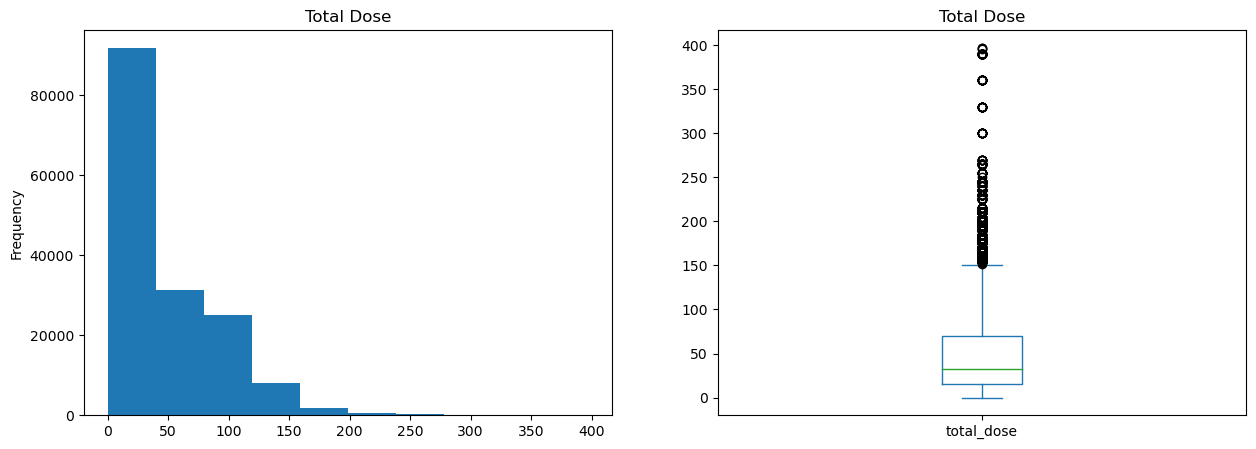

In [37]:
# show distribution of medication dose and outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
m.total_dose.plot(kind='hist', ax=ax1, title='Total Dose')
m.total_dose.plot(kind='box', ax=ax2, title='Total Dose')
plt.show()

In [38]:
# unique data points for total_dose column
print(f'Unique values for total_dose: {m.total_dose.unique().size}')

# show mean, median, min, max for descriptive stats
m.total_dose.describe()[['mean','50%','min','max']]

Unique values for total_dose: 176


mean     45.339715
50%      32.000000
min       0.000000
max     397.000000
Name: total_dose, dtype: float64

### Dive into each column and map values to binary (1 else 0)

In [39]:
# show data types for each column
m.dtypes

patdeid             int64
VISIT               int64
medication        float64
total_dose        float64
admin_location    float64
dtype: object

In [40]:
m.medication.value_counts() # show value counts for medication column

medication
2.0    79571
1.0    79054
Name: count, dtype: int64

In [41]:
# print length of patdeid column, numbe of patients is consistent with CTN protocol
m.patdeid.nunique()

1315

In [42]:
display(m.admin_location.value_counts()) # show value counts for admin_location column
display(m.admin_location.value_counts(normalize=True)) # show value counts for admin_location column

admin_location
1.0    137214
2.0     21333
Name: count, dtype: int64

admin_location
1.0    0.865447
2.0    0.134553
Name: proportion, dtype: float64

In [43]:
# location doesn't provide significant predictive value, drop column
m = m.drop(columns=['admin_location'], axis=1)

There appears to be an issues with duplicates; requires further analysis

In [44]:
# sample random patient IDs to see pattern for duplicates

# create feature to pull random sample from patdeid column
def random_patient(df):
    return df.sample(1).patdeid.values[0]


In [45]:
# show view for patients with multiple visits
m.loc[m.patdeid==random_patient(m)][:25]

,patdeid,VISIT,medication,total_dose
108374,1301,0,2.0,8.0
108375,1301,1,2.0,16.0
108376,1301,1,2.0,20.0
108377,1301,1,2.0,20.0
108378,1301,1,2.0,24.0
108379,1301,1,2.0,24.0
108380,1301,1,2.0,24.0
108381,1301,2,2.0,24.0
108382,1301,2,2.0,24.0
108383,1301,2,2.0,24.0


There's a lot of duplication here; but also 0.0 values in the total dose columns<br>

Next steps<br>
1. Change 0.0 values to nan and backfill with fillna() function
2. Work on duplicate records, preserving unique values for patdeid and visit columns

In [46]:
# for medication dose, turn 0.0 to nan, the backfill nan values with previous value
m.total_dose = m.total_dose.replace(0.0, np.nan).fillna(method='bfill')

In [47]:
# check nan values
print(f'Total nan values in total_dose column: {m.loc[m.total_dose.isna()].size}')

Total nan values in total_dose column: 0


In [49]:
# remove duplicates using strategy listed above
m.loc[m.patdeid==random_patient(m)].drop_duplicates(subset=['patdeid','VISIT'], keep='first')[:25]

,patdeid,VISIT,medication,total_dose
116961,1393,0,1.0,30.0
116967,1393,1,1.0,40.0
116974,1393,2,1.0,50.0
116981,1393,3,1.0,50.0
116988,1393,4,1.0,50.0
116995,1393,5,1.0,60.0
117002,1393,6,1.0,70.0
117009,1393,7,1.0,70.0
117016,1393,8,1.0,70.0
117023,1393,9,1.0,70.0


Data looks great, execute drop duplicates

In [51]:
# assign drop duplicates to new m df
m = m.drop_duplicates(subset=['patdeid','VISIT'], keep='first')


In [52]:
# sanity check
m.loc[m.patdeid==random_patient(m)]

,patdeid,VISIT,medication,total_dose
123380,1477,0,1.0,40.0
123381,1477,1,1.0,50.0
123389,1477,2,1.0,90.0
123396,1477,3,1.0,90.0
123403,1477,4,1.0,45.0
123412,1477,5,1.0,90.0
123417,1477,6,1.0,90.0
123424,1477,7,1.0,90.0
123431,1477,8,1.0,90.0
123440,1477,9,1.0,90.0


Table is ready to be merged!

In [55]:
m.isna().sum() # check for nan values

patdeid          0
VISIT            0
medication    1588
total_dose       0
dtype: int64

In [58]:
m.loc[m.patdeid==1][:25]

,patdeid,VISIT,medication,total_dose
0,1,0,2.0,8.0
1,1,1,2.0,16.0
7,1,2,2.0,32.0
17,1,3,2.0,32.0
23,1,4,2.0,32.0
35,1,5,2.0,32.0
38,1,6,2.0,32.0
41,1,7,2.0,32.0
52,1,8,2.0,32.0
56,1,9,2.0,32.0


In [59]:
# backfill nan for medication column
m.medication = m.medication.fillna(method='bfill')

In [60]:
# look for nans
print(f'Total nan values in medication column: {m.loc[m.medication.isna()].size}')

Total nan values in medication column: 0


In [61]:
# save to csv to merge
m.to_csv('/Users/danherman/Desktop/oud_treatment_outcome/data/clean_data/m_clean.csv', index=False)